In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
cd /content/drive/MyDrive/Knee-project

/content/drive/MyDrive/Knee-project


# Dataset Link:
https://data.mendeley.com/datasets/t9ndx37v5h/1

## for more project and Data sceince materials folow our blog link below:

# http://buffml.com/

# Youtube channel:

# https://www.youtube.com/c/artificialintelligencehub

In [13]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [14]:
import tensorflow
print(tensorflow.__version__)

2.18.0


#Data Preprocessing

In [15]:
import cv2,os
data_path='/content/drive/MyDrive/Knee-project/Knee-Dataset/MedicalExpert-II'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'1Doubtful': 0, '3Moderate': 1, '0Normal': 2, '2Mild': 3, '4Severe': 4}
['1Doubtful', '3Moderate', '0Normal', '2Mild', '4Severe']
[0, 1, 2, 3, 4]


In [16]:
img_size=256
data=[]
label=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)

    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the image  into 256 x 256, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            label.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

# Recale and assign  catagorical labels

In [17]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
label=np.array(label)
from tensorflow.keras.utils import to_categorical
new_label = to_categorical(label)

In [18]:
new_label.shape

(751, 5)

#CNN Model

In [19]:
data.shape

(751, 256, 256, 1)

In [20]:
data.shape[1:]

(256, 256, 1)

In [21]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(128,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The thrid convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from 3rd convolution layer
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
#Dense layer of 128 neurons

model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons

model.add(Dense(5,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 128)  │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 254, 254, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 125, 125, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 60, 60, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,686,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,788,645 (14.45 MB)

 Trainable params: 3,788,645 (14.45 MB)

 Non-trainable params: 0 (0.00 B)

# Splitting data into traning and testing

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,new_label,test_size=0.1)

In [ ]:
np.save('/content/drive/MyDrive/Knee-project/x_train.npy', x_train)
np.save('/content/drive/MyDrive/Knee-project/x_test.npy', x_test)
np.save('/content/drive/MyDrive/Knee-project/y_train.npy', y_train)
np.save('/content/drive/MyDrive/Knee-project/y_test.npy', y_test)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-4ab029ef585b>", line 1, in <cell line: 0>
    np.save('x_train.npy', x_train)
  File "/usr/local/lib/python3.11/dist-packages/numpy/lib/_npyio_impl.py", line 570, in save
    file_ctx = open(file, "wb")
               ^^^^^^^^^^^^^^^^
OSError: [Errno 107] Transport endpoint is not connected: 'x_train.npy'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'OSError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "

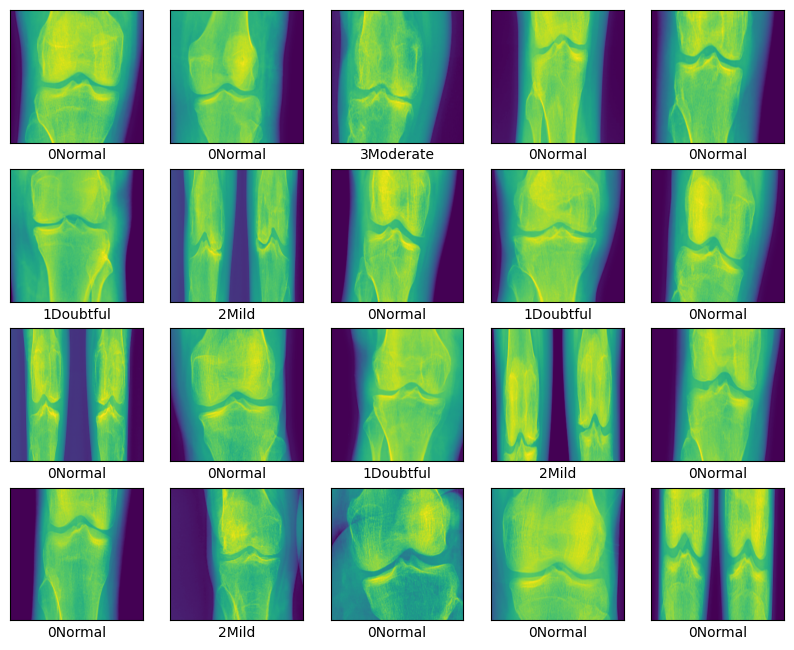

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_test[i]))
    plt.xlabel(categories[np.argmax(y_test[i])])
plt.show()

In [25]:
history=model.fit(x_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 29s 954ms/step - accuracy: 0.4796 - loss: 1.2764 - val_accuracy: 0.6667 - val_loss: 1.0671
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 132ms/step - accuracy: 0.6814 - loss: 1.0236 - val_accuracy: 0.6667 - val_loss: 1.0913
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - accuracy: 0.6586 - loss: 1.0620 - val_accuracy: 0.6741 - val_loss: 0.9941
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.6777 - loss: 0.8920 - val_accuracy: 0.6741 - val_loss: 1.0641
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.6649 - loss: 1.0275 - val_accuracy: 0.6741 - val_loss: 0.9512
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.6539 - loss: 0.9602 - val_accuracy: 0.6889 - val_loss: 0.9296
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - accuracy: 0.6808 - loss: 0.9107 - val_accuracy: 0.6889 - val_loss: 0.8833
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.6524 - loss: 0.8730 - val_ac

In [26]:
# model.save('model.h5')
model.save('/content/drive/MyDrive/Knee-project/model.keras')

In [27]:
from matplotlib import pyplot as plt

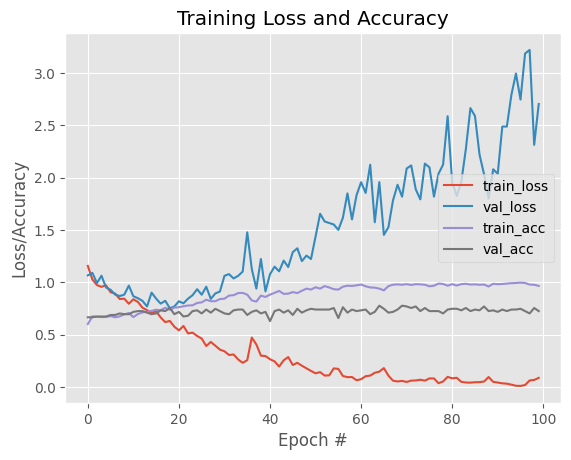

In [28]:
# plot the training loss and accuracy
N = 100 #number of epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.show()

In [29]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
plt.savefig("/content/drive/MyDrive/Knee-project/CNN_Model.png")

Mounted at /content/drive


<Figure size 640x480 with 0 Axes>

In [30]:
vaL_loss, val_accuracy= model.evaluate(x_test, y_test, verbose=0)
print("test loss:", vaL_loss,'%')
print("test accuracy:", val_accuracy,"%")

test loss: 2.3041810989379883 %
test accuracy: 0.75 %


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step
A.I predicts: 0Normal
Correct prediction for label 2 is 0Normal


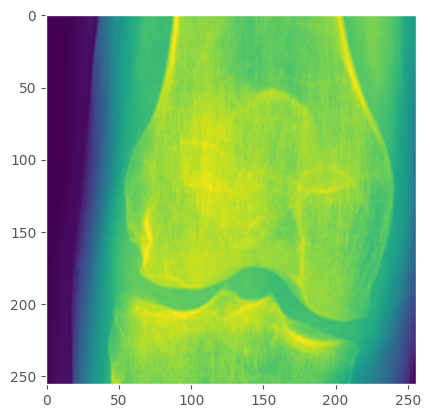

In [31]:
X = 32

img_size = 256

img_single = x_test[X]
img_single = cv2.resize(img_single, (img_size, img_size))
img_single = (np.expand_dims(img_single, 0))
img_single = img_single.reshape(img_single.shape[0],256,256,1)

predictions_single = model.predict(img_single)
print('A.I predicts:',categories[np.argmax(predictions_single)])
print("Correct prediction for label",np.argmax(y_test[X]),'is',categories[np.argmax(y_test[X])])
plt.imshow(np.squeeze(img_single))
plt.grid(False)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("/content/drive/MyDrive/Knee-project/model.keras")

In [ ]:
import numpy as np

# Load the arrays back
x_train = np.load('/content/drive/MyDrive/Knee-project/x_train.npy', allow_pickle=True)
x_test = np.load('/content/drive/MyDrive/Knee-project/x_test.npy', allow_pickle=True)
y_train = np.load('/content/drive/MyDrive/Knee-project/y_train.npy', allow_pickle=True)
y_test = np.load('/content/drive/MyDrive/Knee-project/y_test.npy', allow_pickle=True)

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

test_labels = np.argmax(y_test, axis=1)
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=-1)


cm  = confusion_matrix(test_labels, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(5), ['Normal','Doubtful','Mid','Moderate','Severe'], fontsize=16)
plt.yticks(range(5), ['Normal','Doubtful','Mid','Moderate','Severe'], fontsize=16)
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-80db590f9c7a>", line 2, in <cell line: 0>
    from mlxtend.plotting import plot_confusion_matrix
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1138, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 1078, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1507, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1476, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1434, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

test_labels = np.argmax(y_test, axis=1)
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=-1)

cm = confusion_matrix(test_labels, predictions)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal','Doubtful','Mid','Moderate','Severe'],
            yticklabels=['Normal','Doubtful','Mid','Moderate','Severe'])
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('True', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-ae1496dfdf9a>", line 1, in <cell line: 0>
    import seaborn as sns
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1138, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 1078, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1507, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1476, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1434, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceb

# My GitHub Profile Link:

# https://github.com/noumannahmad